In [10]:
from montu import *
#from montu.__cycle_1 import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
mtime = MonTime('bce2501-01-01 12:00:00')
mtime = MonTime('2501 b.c.e. 01-01 12:00:00')
mtime = MonTime('-2500-01-01 12:00:00')
print(mtime)

Montu Time Object:
--------------------------
Date in proleptic UTC: -2500-01-01 12:00:00.0002
Date in mixed UTC: -2500-01-22 12:00:00
Date in SPICE format: 2501 B.C. 01-01 12:00:00.200
General:
    Components: [-1, 2500, 1, 1, 12, 0, 0, 200]
    Is bce: True
    Is Julian: True
Uniform scales:
    Terrestrial time:
        tt: -142006202700.3199
        jtd: 807954.69096852
    UTC time:
        et: -142006262399.99988
        jed: 807954.0
    Delta-t = TT - UTC = 59699.68000000001
Objects:
    Date in datetime64 format: -2500-01-01T12:00:00.000200
    Date in PyPlanet Epoch: 807954.0
    Date in PyEphem Epoch: -2501/1/22 12:00:00
    Date in AstroPy Time: 807954.69096852
Astronomical properties at Epoch:
    True obliquity of ecliptic: 23:58:33.587
    True nutation longitude: 00:00:10.214
    Greenwhich Meridian Sidereal Time: 18:40:25.323



In [12]:
Montu.load_kernels(PRECISION_KERNELS)

In [13]:
earth = PlanetaryBody('Earth')
tebas = ObservingSite(planet=earth,lon=33,lat=24,height=0)
mtime = MonTime('-2500-01-01 12:00:00')
mars = PlanetaryBody('Mars')

In [14]:
mars.calculate_sky_position(mtime,tebas)

Computing position of body 'mars' at epoch: jtd = 807954.69096852 
Updating orientation of site (old time 2000-01-01 11:58:56.1262, new time 2501 B.C. 01-01 12:00:00.200)
Method 'SPICE':
	Position Epoch: prolectic gregorian -2500-01-01 12:00:00.0002, JED = 807954.0
	Coordinates @ J2000: 
		Equatorial: 12:31:48.754 01:37:12.184
		Ecliptic: 186:39:46.949 04:38:36.308
	Coordinates @ Epoch : 
		Equatorial: 08:32:9.796 24:06:28.555
		Ecliptic: 124:21:21.542 04:39:5.339
	Observing conditions: 
		Distance to site [au]:  0.660450348835636
		Distance to sun [au]:  1.626114972997512
		Solar elongation [deg]:  157:49:18.876
		Phase angle [deg]:  13:21:31.981
		Magnitude:  -1.1
	Other properties: 
		Local true sidereal time:  20:52:25.323
		Hour angle @ Epoch:  12:20:15.527
		Local coordinates @ Epoch:  06:11:24.275 -41:38:31.094


In [15]:
mars.calculate_sky_position(mtime,tebas,method='all')

Computing position of body 'mars' at epoch: jtd = 807954.69096852 
Method 'Horizons':
	Position Epoch: prolectic gregorian -2500-01-01 12:00:00.0002, JED = 807954.0
	Coordinates @ J2000: 
		Equatorial: 12:31:49.147 01:37:6.708
		Ecliptic: 186:39:54.558 04:38:33.609
	Coordinates @ Epoch : 
		Equatorial: 08:32:9.283 24:06:29.556
		Ecliptic: 124:21:14.472 04:39:4.619
	Observing conditions: 
		Distance to site [au]:  0.66052182424896
		Distance to sun [au]:  1.626124866723
		Solar elongation [deg]:  157:47:51.000
		Phase angle [deg]:  13:22:14.880
		Magnitude:  -1.1
	Other properties: 
		Local true sidereal time:  20:52:25.323
		Hour angle @ Epoch:  12:20:16.054
		Local coordinates @ Epoch:  06:11:33.727 -41:38:29.317
Method 'VSOP87':
	Position Epoch: prolectic gregorian -2500-01-01 12:00:00.0002, JED = 807954.0
	Coordinates @ J2000: 
		Equatorial: 12:31:48.360 01:37:33.109
		Ecliptic: 186:39:33.205 04:38:53.193
	Coordinates @ Epoch : 
		Equatorial: 08:32:9.718 24:06:40.920
		Ecliptic: 124

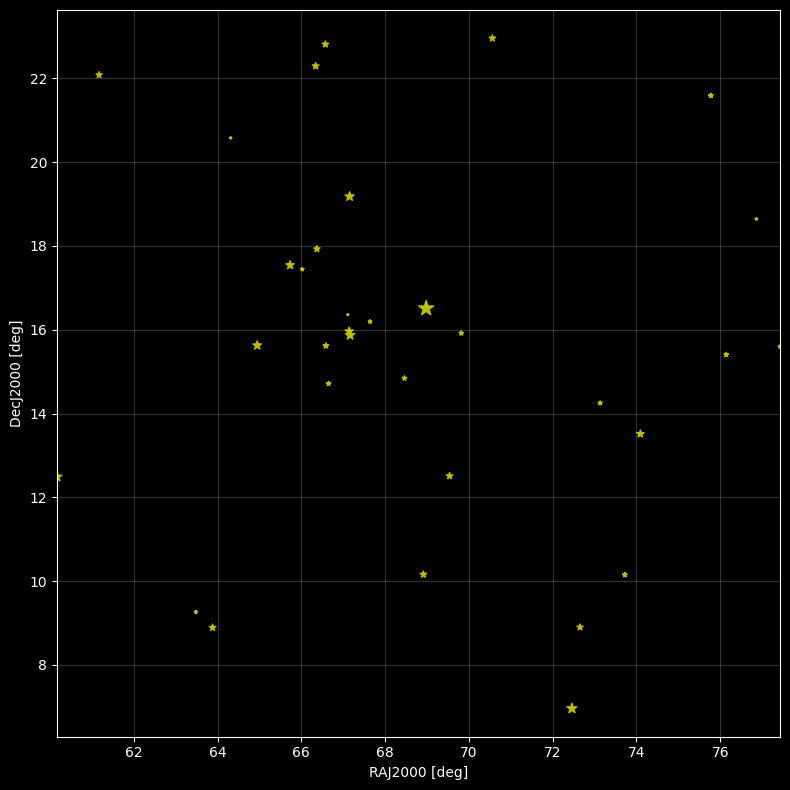

In [16]:
aldebaran = ALL_STARS.get_stars(ProperName='Aldebaran')
hyades = ALL_STARS.get_stars_area(RA=aldebaran.data.RA,Dec=aldebaran.data.Dec,radius=10,Mag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=False,figargs=dict(figsize=(8,8)))
fig.savefig('gallery/hyades.png')